In [11]:
#%matplotlib inline
#%matplotlib widget
%matplotlib notebook

In [12]:
import uhd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.fft import fft, fftfreq, fftshift
from scipy import signal

In [13]:
usrp = uhd.usrp.MultiUSRP()

In [14]:
SAMPLE_RATE = 20e6
NUM_SAMPS = 400
CENTER_FREQ = 113.0e6
GAIN = 50

In [15]:
samples = usrp.recv_num_samps(NUM_SAMPS, CENTER_FREQ, SAMPLE_RATE, [0], GAIN)

<IPython.core.display.Javascript object>


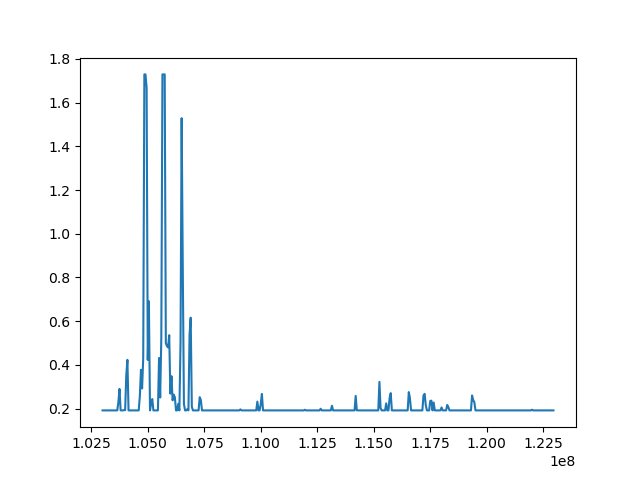

In [16]:
window = signal.windows.hann(NUM_SAMPS)
yf = fft(samples[0] * window)
yf = fftshift(yf)
yf = np.abs(yf)
std = np.std(yf)
yf = np.clip(yf, std / 3, std * 3)

xf = fftshift(fftfreq(NUM_SAMPS, 1 / SAMPLE_RATE) + CENTER_FREQ)
plt.plot(xf, yf)

plt.show()